In [24]:
import natsort as natsort
import pandas as pd
import os
import natsort
from datetime import date, datetime
import matplotlib.pyplot as plt
from matplotlib import rc
from urllib.parse import quote

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']= False
from IPython.core.display_functions import display

# Schedule.ipynb를 작성하고 나서
### 의외로 득실차는 LG가 더 좋았다.

In [25]:
team_list = ["LG", "SSG", "키움"]
color_list=["#DB1916", "#fff000", "#760c0c"]
check_list = ["순위", "승리","득실차", "게임차"]

init_data = [0,0,0,0,0,0]
KBO_team = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배", "득점", "실점"], index=team_list)
for team in team_list:
    KBO_team.loc[team] = init_data

KBO_team

,경기수,승리,무승부,패배,득점,실점
LG,0,0,0,0,0,0
SSG,0,0,0,0,0,0
키움,0,0,0,0,0,0


In [26]:
rank_list = os.listdir("./date_rank")
sorted_rank = natsort.natsorted(rank_list)

In [27]:
df_list = []
for team, color in zip(team_list, color_list):
    df_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","득점","실점","승점", "게임차", "순위", "일자", "득실차"])

    for file in sorted_rank:
        if file == ".DS_Store":
            continue
        date = datetime.strptime("2022."+file.replace('.csv', ''), '%Y.%m.%d')
        rank_df = pd.read_csv('./date_rank/'+file, index_col=0)
        rank_df["일자"] = date
        rank_df["승리"] = abs(rank_df["승리"]-rank_df.loc["SSG", "승리"])
        rank_df["득실차"] = rank_df["득점"] - rank_df["실점"]

        rank_list = list(rank_df.loc[team, :])
        df_result.loc[len(df_result)] = rank_list
    df_list.append(df_result)

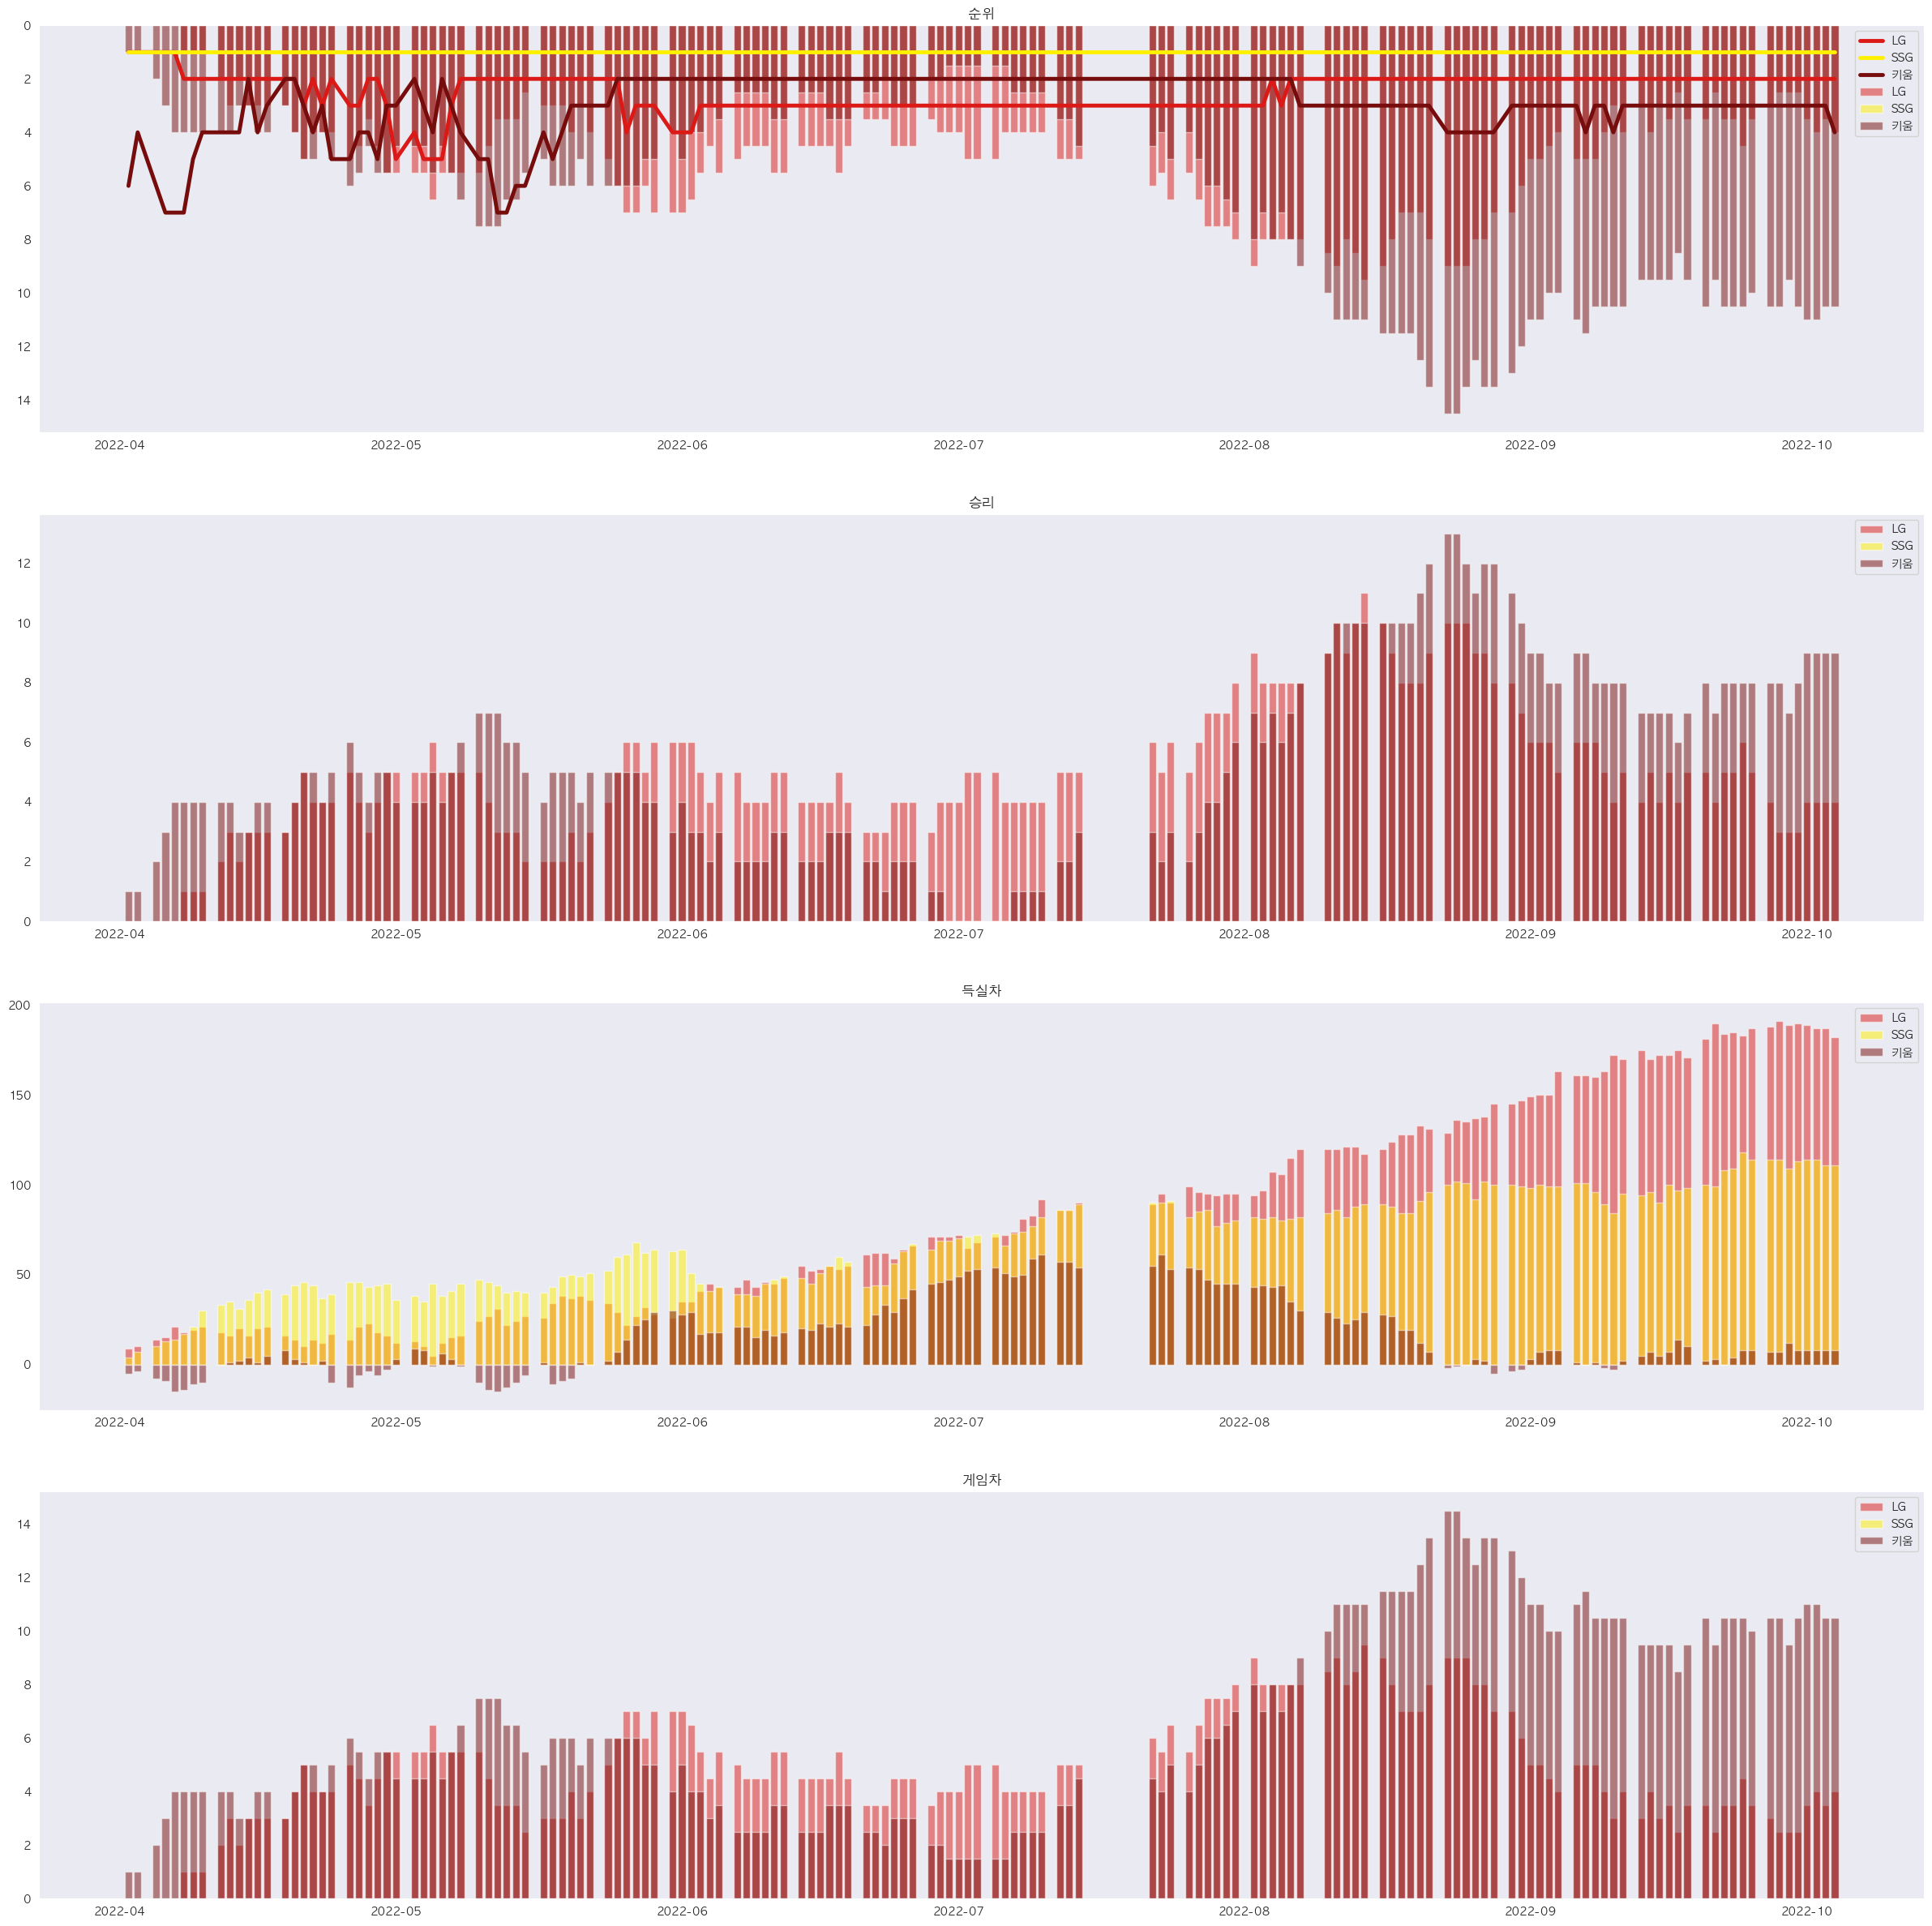

In [28]:
nrow = 3
ncol = 1
plt.figure(figsize=(30,30))

for r, check in enumerate(check_list, start=1):
    plt.subplot(4, 1, r)
    plt.title(check)
    for team, color, name in zip(df_list, color_list, team_list):
        if r != 1:
            plt.bar(team["일자"], team[check], label=name, color=color, alpha=0.5)
        elif r==1:
            plt.plot(team["일자"], team[check], label=name, color=color, linewidth=3.5)
            plt.bar(team["일자"], team["게임차"], label=name, alpha=0.5, color=color)
            plt.gca().invert_yaxis()
    plt.grid()
    plt.legend(loc='best')

plt.show()

- 전반기에는 SSG가 더 적게 실점하고 더 많이 득점을 얻어내는 경향을 보였음
- 하지만 6월 두 팀 간의 격차가 줄어들기 시작함
- 결국 올스타전 이후로 LG가 득실차에서 더 우위를 선점하기 시작함.
- LG가 하지만 결국 승리 차이를 극복하는데는 실패함

- 여기까지가 `네이버 경기일정`에서 얻어낸 정보

# 어떤 이유로 SSG가 2022시즌 우승을 거둘 수 있었는가?
### wire to wire 우승에 대해서는 추후에 조사할 예정.


In [29]:
query = quote("SSG") #protecting for unicode error
url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=0&ys=2022&ye=2022&se=0&te={}&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR_ALL_ADJ&o2=TPA&de=1&lr=0&tr=&cv=&ml=1&sn=50&si=&cn=".format(query)
# pa => 시작 인덱스
# sn => 화면에 나타낼 데이터 수
# 즉, pa=0&sn=30 -> 0번부터 30개 정보 출력 / pa=0&sn=50 -> 0번부터 50개 정보 있는대로 출력
df = pd.read_html(url, index_col=1)
df[0]

이름      순      팀     정렬    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    비율  \
이름      순      팀   WAR*    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    타율   
최정      1  22S3B   5.14  121  505  414  80  110  21   0  ...   0   6  .266   
최지훈     2  22SCF   4.78  143  640  570  93  173  32   4  ...  12   4  .304   
박성한     3  22SSS   4.23  139  560  490  68  146  24   4  ...   6   2  .298   
한유섬     4  22SRF   3.89  135  545  458  62  121  33   1  ...   0   5  .264   
추신수     5  22SDH   2.37  112  499  409  77  106  20   1  ...   2   4  .259   
김강민     6  22SCF   1.33   84  202  178  24   54  11   0  ...   2   1  .303   
라가레스    7  22SLF   1.19   49  202  180  24   57   9   0  ...   4   3  .317   
전의산     8  22S1B   0.92   76  263  238  35   59  15   1  ...   0   1  .248   
최주환     9  22S2B   0.63   96  329  294  36   63  14   2  ...   0   2  .214   
이재원    10   22SC   0.28  105  279  234  27   47   6   0  ...   9   3  .201   
이름      순      팀     정렬    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    비율   
이름      순      팀   WAR*    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    타율   
하재훈    11  22SLF   0.21   59  111  104  18   23   6   1  ...   0   2  .221   
김민식    12   22SC   0.14   82  204  168  23   36   7   1  ...   6   2  .214   
안상현    13  22S2B   0.12   45   43   34  12    6   0   0  ...   3   0  .176   
최경모    14  22S3B   0.12   97   75   73  16   22   2   0  ...   1   0  .301   
이정범    15  22SRF   0.08    6    8    8   2    3   0   0  ...   0   0  .375   
오태곤    16  22SLF   0.08  130  295  263  48   61  15   1  ...   5   3  .232   
최준우    17  22S2B   0.08    9   15   11   0    3   0   0  ...   0   1  .273   
조형우    18   22SC   0.04    8   10    9   2    2   1   0  ...   0   0  .222   
김택형    19   22SP   0.00    1    0    0   0    0   0   0  ...   0   0   NaN   
서동민   NaN   22SP   0.00    1    0    0   0    0   0   0  ...   0   0   NaN   
이름      순      팀     정렬    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    비율   
이름      순      팀   WAR*    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    타율   
고효준   NaN   22SP   0.00    2    0    0   0    0   0   0  ...   0   0   NaN   
최민준   NaN   22SP   0.00    1    0    0   0    0   0   0  ...   0   0   NaN   
조요한   NaN   22SP   0.00    1    0    0   0    0   0   0  ...   0   0   NaN   
박민호   NaN   22SP   0.00    1    0    0   0    0   0   0  ...   0   0   NaN   
전경원    25    22S  -0.02    1    1    1   0    0   0   0  ...   0   0  .000   
최상민    26  22SLF  -0.07   26   15   11   3    1   0   0  ...   1   0  .091   
석정우    27  22S2B  -0.08    8    7    7   1    1   0   0  ...   0   0  .143   
김재현    28  22S3B  -0.10   18   20   18   2    4   1   0  ...   2   0  .222   
오준혁    29  22SRF  -0.12   47   67   61   3   14   2   0  ...   1   0  .230   
김규남    30  22SRF  -0.13    2    5    5   0    0   0   0  ...   0   0  .000   
이름      순      팀     정렬    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    비율   
이름      순      팀   WAR*    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    타율   
이현석    31   22SC  -0.16    9   15   15   0    2   0   0  ...   0   0  .133   
이흥련    32   22SC  -0.19   22   55   45   4    6   2   0  ...   3   0  .133   
크론     33  22S1B  -0.20   67  259  243  21   54  13   1  ...   0   4  .222   
최항     34  22SDH  -0.31   15   24   20   0    2   0   0  ...   0   1  .100   
김성현    35  22S2B  -0.58  130  359  302  38   66   9   1  ...  20   3  .219   

이름                                     WAR*    WPA  
이름      출루    장타   OPS  wOBA    wRC+   WAR*    WPA  
최정    .386  .505  .891  .400   145.2   5.14   3.72  
최지훈   .362  .426  .788  .357   120.8   4.78   1.77  
박성한   .376  .376  .751  .350   117.1   4.23   1.46  
한유섬   .373  .478  .851  .382   134.8   3.89   3.45  
추신수   .382  .430  .813  .374   129.7   2.37   2.01  
김강민   .375  .449  .824  .372   129.5   1.33   1.07  
라가레스  .364  .467  .830  .368   126.8   1.19   1.19  
전의산   .316  .471  .786  .349   111.5   0.92   0.22  
최주환   .292  .367  .659  .302    81.6   0.63  -0.38  
이재원   .296  .278  .574  .267    57.8   0.28  -1.59  
이름      비

In [30]:
df[0] = df[0].drop(["팀"], axis=1)

/var/folders/lz/2mfdswrd571f8d69ht6n663w0000gn/T/ipykernel_14627/3901085681.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df[0] = df[0].drop(["팀"], axis=1)


In [31]:
test = df[0]["비율"]
#test = test.drop(["wRC+", "OPS"], axis=1)

In [32]:
test = test.dropna() #투수들 기록은 nan값으로 나옴. 그런데, nan으로 안나왔다면, 진짜로 타석에 선거라 그건 의미있는 자료가 맞다고 판단해서 넣을 예정임
test = test.drop(["이름"]) #테이블이 크다보니 범례 row가 한 번 더 나타나서 그거 제거함

In [33]:
test = test.astype('float64') #object 형으로 출력되므로, float로 변환하여 plot을 그려볼 예정
test.dtypes

이름
타율      float64
출루      float64
장타      float64
OPS     float64
wOBA    float64
wRC+    float64
dtype: object

In [34]:
test["출-타"] = test["출루"] - test["타율"]
test["장-타"] = test["장타"] - test["타율"]
test["장-출"] = test["장타"] - test["출루"]
test

이름,타율,출루,장타,OPS,wOBA,wRC+,출-타,장-타,장-출
최정,0.266,0.386,0.505,0.891,0.400,145.2,0.120,0.239,0.119
최지훈,0.304,0.362,0.426,0.788,0.357,120.8,0.058,0.122,0.064
박성한,0.298,0.376,0.376,0.751,0.350,117.1,0.078,0.078,0.000
한유섬,0.264,0.373,0.478,0.851,0.382,134.8,0.109,0.214,0.105
추신수,0.259,0.382,0.430,0.813,0.374,129.7,0.123,0.171,0.048
김강민,0.303,0.375,0.449,0.824,0.372,129.5,0.072,0.146,0.074
라가레스,0.317,0.364,0.467,0.830,0.368,126.8,0.047,0.150,0.103
전의산,0.248,0.316,0.471,0.786,0.349,111.5,0.068,0.223,0.155
최주환,0.214,0.292,0.367,0.659,0.302,81.6,0.078,0.153,0.075
이재원,0.201,0.296,0.278,0.574,0.267,57.8,0.095,0.077,-0.018


<AxesSubplot: >

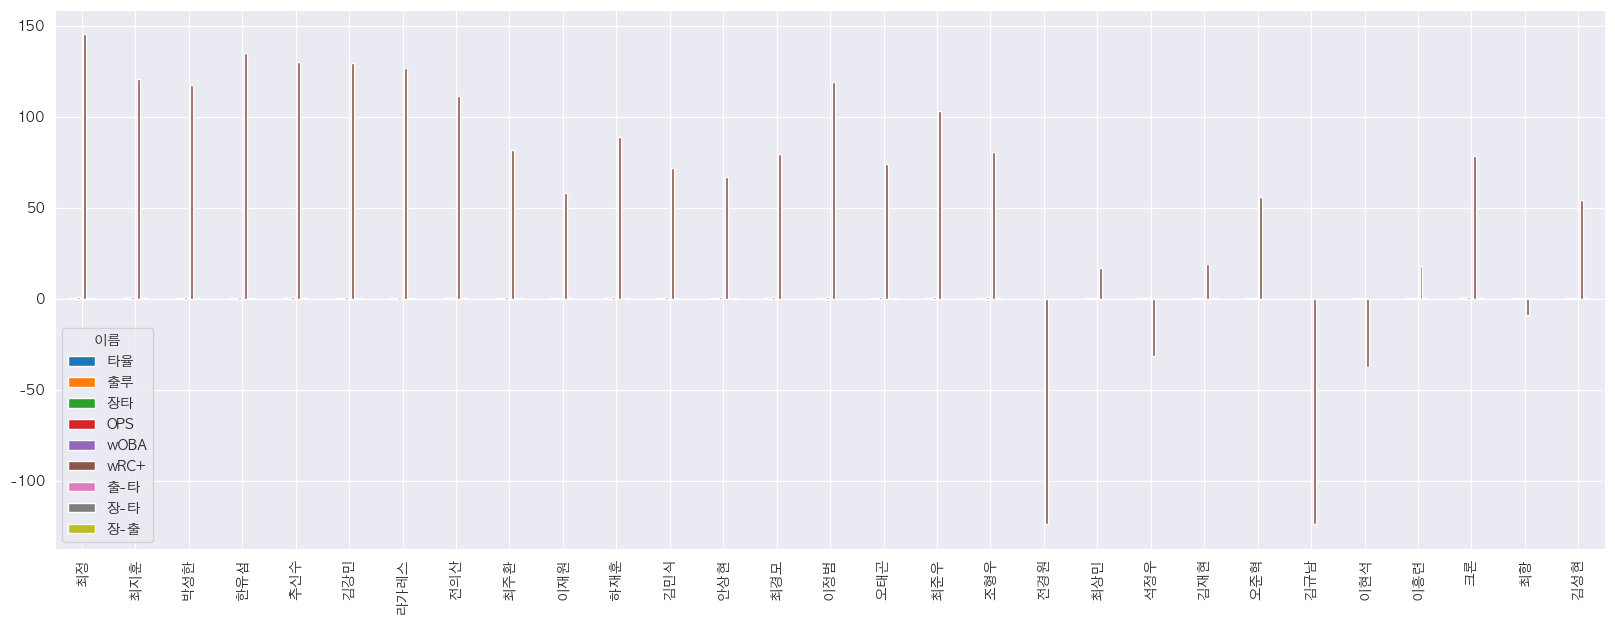

In [35]:
test.plot(kind="bar", figsize=(20, 7), grid=True)

<AxesSubplot: title={'center': '출루/타율 단순 비교'}>

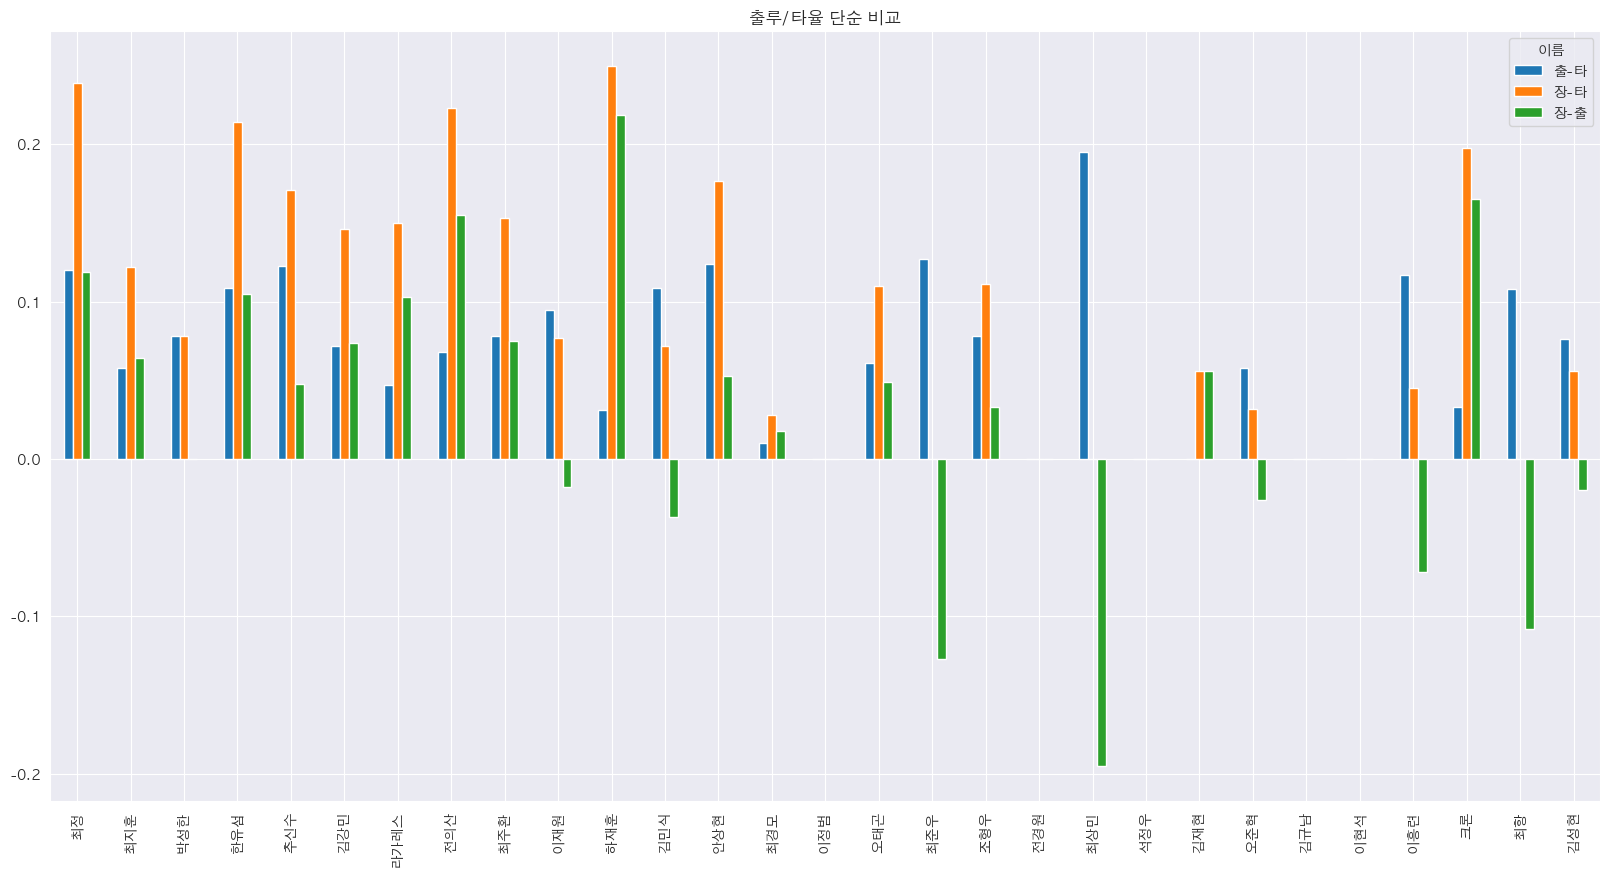

In [36]:
test[["출-타", "장-타", "장-출"]].plot(kind='bar', figsize=(20,10), title="출루/타율 단순 비교", grid=True)

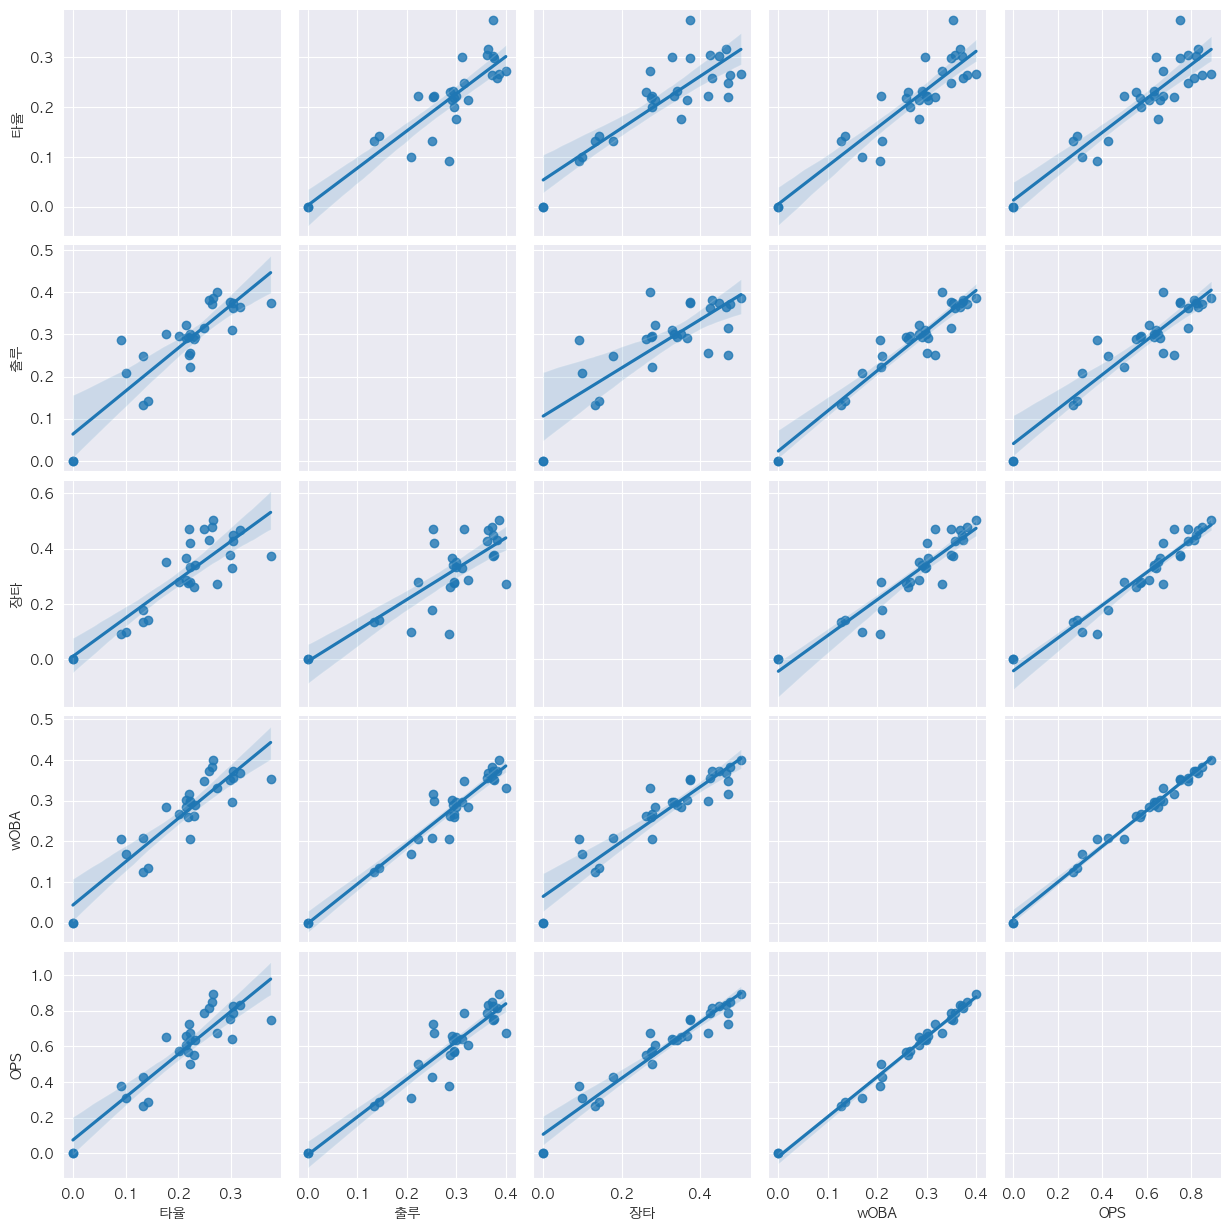

In [38]:
test = test.astype('float')
import seaborn as sns

plot = sns.pairplot(test[["타율","출루","장타","wOBA","OPS"]], diag_kind='None', kind='reg')
plot.savefig('./img/pairplot/test.png')